In [ ]:
NAME = "William Rathgeb"

---

# Lab 7: Dimensionality Reduction

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file and the PDF file from Colab and upload it to Gradescope. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [ ]:
!pip install gensim

import pandas as pd
import numpy as np 
import gensim
import requests
import string

from IPython.display import Image
from sklearn.manifold import TSNE

# To make the visualizations
!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript
from gensim.models import KeyedVectors

# To download trained model (Google news)
import gensim.downloader as api
google_model = api.load('word2vec-google-news-300')

import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 1055, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 1055 (delta 23), reused 0 (delta 0), pack-reused 1016
Receiving objects: 100% (1055/1055), 1.96 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (612/612), done.
[=================================================-] 99.3% 1651.9/1662.8MB downloaded


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Q1** (0.25 points)
Download your text corpus. (A good place to start is the [nltk corpus](http://www.nltk.org/nltk_data/) or the [gutenberg project](https://www.gutenberg.org/))

In [ ]:
#your code here
url = "https://www.gutenberg.org/cache/epub/69308/pg69308.txt" ## Your raw text file location 


In [ ]:
#Save the raw text that you just downloaded in this variable
raw = requests.get(url).content.decode('utf8')

In [ ]:
#This is an autograded cell, do not edit/delete
print(raw[:1000])

﻿The Project Gutenberg eBook of The call from beyond, by Clifford D.
Simak

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The call from beyond

Author: Clifford D. Simak

Release Date: November 7, 2022 [eBook #69308]

Language: English

Produced by: Greg Weeks, Mary Meehan and the Online Distributed
             Proofreading Team at http://www.pgdp.net

*** START OF THE PROJECT GUTENBERG EBOOK THE CALL FROM BEYOND ***





                         THE CALL FROM BEYOND

                         By CLIFFORD D. SIMAK

                  _Alone, accursed, he set


### **Q2** (0.25 points)
Tokenize your corpus. Make sure that that the result is a list of lists i.e. The top-level list (outer list) is a list of sentences, and the inner list is a list of words in a given sentence.

Consider the following text:

```
text = "I spent $15.35 on my lunch today. Food in Berkeley is very expensive!"
```

It could be tokenized as follows:

```
tok_corp = [['I', 'spent', '$', '15.35', 'on', 'my', 'lunch', 'today'],
 ['Food', 'in', 'Berkeley', 'is', 'very', 'expensive']]
```


Note: There are many different (and correct) ways of tokenizing. Your answer doesn't need to match exactly with this illustrative example.

In [ ]:
#code here
pattern = r'''(?x)  # set flag to allow verbose regexps

(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [ ]:
sentences = [[sentence] for sentence in tokenized_raw]

In [ ]:
words = [sentence[0].split(" ") for sentence in sentences]

In [ ]:
#Save the tokenized sentences as a list of list in this variable
tok_corp = words

In [ ]:
#This is an autograded cell, do not edit/delete
for sent in tok_corp[:3]:
  print(sent)
  print("\n")

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'call', 'from', 'beyond', ',', 'by', 'Clifford', 'D.', 'Simak', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.']


['You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', '.']


['gutenberg', '.']




### **Q3** (0.25 points)
Train gensim using your own dataset. Name the trained model variable as `model`.



In [ ]:
#code here
model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)

In [ ]:
#This is an autograded cell, do not edit/delete
print(f'Corpus Size: {model.corpus_total_words}')
print(f'Corpus Count: {model.corpus_count}')
print(f'Training time: {model.total_train_time}')
print(f'Sample words: {list(model.wv.vocab.keys())[:10]}')

Corpus Size: 17391
Corpus Count: 1185
Training time: 0.09455420300037076
Sample words: ['The', 'Project', 'Gutenberg', 'eBook', 'of', 'call', 'from', 'beyond', ',', 'by']


### **Q4** (0.25 points)



#### **Q4a** 

Create a list of the unique set of words from your corpus. Name the list variable as `unique_words`.


In [ ]:
#code here
unique_words = np.unique(list(model.wv.vocab.keys()))

In [ ]:
#This is an autograded cell, do not edit/delete
print(unique_words[:10])

['"' '$1' '$5' "'" '(' ')' '*' ',' '-' '.']


#### **Q4b** 

Extract respective vectors corresponding to the words in your corpus and store the vectors in a variable called `vector_list`.

In [ ]:
#code here
vector_list = [model.wv[word] for word in unique_words]

In [ ]:
#This is an autograded cell, do not edit/delete
print(f'Array Shape: {np.array(vector_list).shape}')
for i in range(5):
    print(unique_words[i], vector_list[i])

Array Shape: (2916, 16)
" [-0.40538082 -0.10862581  0.4069639   0.6247494  -0.19431747 -0.7580373
 -0.50037605  0.5091249   0.25279158  0.9736831  -0.1804978   0.7447186
 -0.5789818  -1.2962847  -0.01606695  0.9212546 ]
$1 [-0.01288718 -0.00043277  0.00515827  0.0197791  -0.04016294 -0.02910878
 -0.00233627  0.02713933  0.0316992   0.04931327  0.00067851  0.01396319
 -0.05261169 -0.05771459 -0.0106656   0.01950076]
$5 [ 0.00531264  0.02348157  0.01443638  0.05936251 -0.01891907 -0.02311298
  0.00050142 -0.00073719  0.02194519  0.04824919  0.01026239  0.02659354
 -0.01993911 -0.06796008  0.02803815  0.07607689]
' [-0.0730776  -0.0364102   0.06271814  0.07442135 -0.03554402 -0.14700863
 -0.09665375  0.0954008   0.02142817  0.13789691  0.00371062  0.14438374
 -0.11956461 -0.22071081 -0.00323224  0.13541287]
( [-0.250914   -0.06913757  0.26491475  0.32403702 -0.10297703 -0.45701084
 -0.3031196   0.27062353  0.15917687  0.5375874  -0.05815089  0.41551247
 -0.34245646 -0.7402095   0.02608711

### **Q5** (3 points)
Based on your knowledge and understanding of the text corpus you have chosen, **form 3 hypotheses** of analogies or relationships (between words) that you expect will hold and **give a reason why. Experimentally validate these hypotheses** using similarity of the word vectors. 

**Example**: If using Moby Dick as the corpus, one hypothesis might be that the whale, "Moby Dick" is (cosine) more similar to "fate" than to "evil" because Moby Dick is symbolic of the nature and the universe and isn't necessarily 'bad'. Or "Moby Dick" is more similar to "opposition" than to "surrender" because Moby Dick fights for its survival.

Note: Please do NOT use the same example as in the prompt. 

Note 2: It's okay if the model disproves your hypotheses.

1: I think that hoped would be more cosine similar to solution than to quit because hope and quitting are not seen together, and hope and solution can go hand in hand.

2: I think that rule would be more cosine similar to comply than to split because people comply (or don't) with rule over themselves, and unified rule can prevent splits and division. 

3: I think hillside and valley will be more cosine similar than hillside and pyramid because where there are hills there must be valleys and most pyramids aren't built on hills as far as I know. 


In [ ]:
#your code here for validating hypotheses 1
quit = np.dot(model.wv["hoped"],model.wv["quit"]
              )/(np.linalg.norm(model.wv["quit"])*np.linalg.norm(model.wv["hoped"]))
sol = np.dot(model.wv["hoped"],model.wv["solution"]
             )/(np.linalg.norm(model.wv["solution"])*np.linalg.norm(model.wv["hoped"]))
print(f"quit: {quit}, solution: {sol}")

quit: -0.39356178045272827, solution: -0.18107494711875916


In [ ]:
#your code here for validating hypotheses 2
comply = np.dot(model.wv["rule"],model.wv["comply"]
                )/(np.linalg.norm(model.wv["rule"])*np.linalg.norm(model.wv["comply"]))
split = np.dot(model.wv["rule"],model.wv["split"]
               )/(np.linalg.norm(model.wv["rule"])*np.linalg.norm(model.wv["split"]))
print(f"comply: {comply}, split: {split}")

comply: 0.764279842376709, split: 0.5933480858802795


In [ ]:
#your code here for validating hypotheses 3
valley = np.dot(model.wv["hillside"],model.wv["valley"]
                )/(np.linalg.norm(model.wv["hillside"])*np.linalg.norm(model.wv["valley"]))
pyramid = np.dot(model.wv["hillside"],model.wv["pyramid"]
                 )/(np.linalg.norm(model.wv["pyramid"])*np.linalg.norm(model.wv["hillside"]))
print(f"valley: {valley}, pyramid: {pyramid}")

valley: 0.5875806212425232, pyramid: 0.7198427319526672


### **Q6** Visualizing the trained vectors (1.5 points)

#### **Q6a**

Run K-means clustering on your word vectors (as you did in Q-6 of Lab-5). Use the word vectors from the model you trained in this lab.

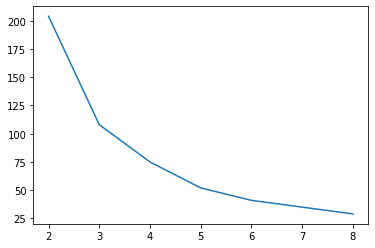

In [ ]:
#your code here
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.DataFrame(vector_list)
df["words"] = unique_words
df.set_index("words", inplace = True)

x = np.arange(2, 9)
y = np.arange(2, 9)
for k in x:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(vector_list)
  y[k -2] = kmeans.inertia_
plt.plot(x, y)


kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(vector_list)

df["Cluster"] = kmeans.labels_

#### **Q6b**
Reduce the dimensionality of your word vectors using TSNE

In [ ]:
#your code here
data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2916 samples in 0.001s...
[t-SNE] Computed neighbors for 2916 samples in 1.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2916
[t-SNE] Computed conditional probabilities for sample 2000 / 2916
[t-SNE] Computed conditional probabilities for sample 2916 / 2916
[t-SNE] Mean sigma: 0.030697
[t-SNE] Computed conditional probabilities in 1.259s
[t-SNE] Iteration 50: error = 74.1270905, gradient norm = 0.0520295 (50 iterations in 7.286s)
[t-SNE] Iteration 100: error = 71.1429901, gradient norm = 0.0076601 (50 iterations in 1.136s)
[t-SNE] Iteration 150: error = 70.9816589, gradient norm = 0.0129738 (50 iterations in 1.082s)
[t-SNE] Iteration 200: error = 70.9408417, gradient norm = 0.0147373 (50 iterations in 1.095s)
[t-SNE] Iteration 250: error = 70.9296112, gradient norm = 0.0098222 (50 iterations in 1.091s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.929611
[t-SNE] Iteration 300: err

#### **Q6c**

#### Create a dataframe with the following columns:

| Column |Description|
| --- | --- | 
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- | 
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [ ]:
#your code here
kmeans = KMeans(n_clusters=25, random_state=42)
X = np.array(vector_list)
kmeans.fit(X)

df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,31.058922,55.611824,"""",1
1,-0.305312,-9.755009,$1,16
2,-6.975836,1.796154,$5,15
3,-6.466670,53.330887,',11
4,24.423370,59.847363,(,14


#### **Q6d: Visualization** 

In this question, you are required to visualize and explore the reduced dataset you created in Q6c using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the library from github. Make sure that it has been executed properly before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/mytext_new.tsv'

Example:

```
df.to_csv('d3-scatterplot/mytext_new.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [ ]:
#your code here
df.to_csv('d3-scatterplot/mytext_new.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [ ]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'mytext_new.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization. 

Please include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a snapshot of the visualization and save it on your computer with the filename `trained_scatter.png`

2) Upload the `trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

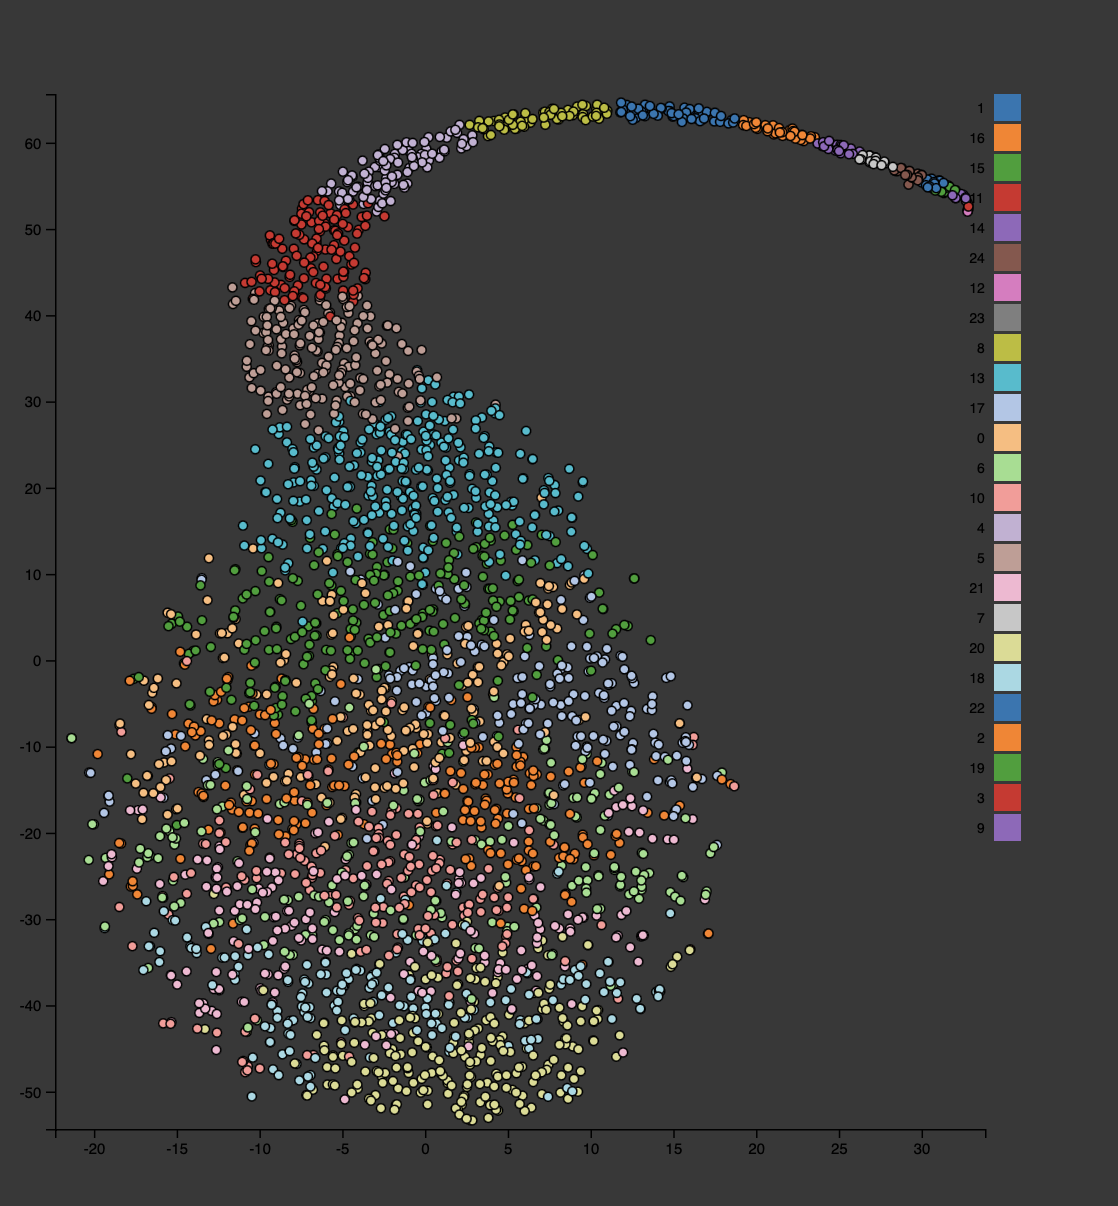

In [ ]:
#This is an autograded cell, do not edit/delete
Image('trained_scatter.png')

### **Q7** Visualizing the PRE-TRAINED vectors (1.5 points)

In this question, you'll execute the same analysis as in Q6, but on PRE-TRAINED vectors.

#### **Q7a**

Load the google vector model 

(It must be downloaded as `GoogleNews-vectors-negative300` for you if you ran the first code-chunk at the top of this notebook)


In [ ]:
google_model

Downsample the pre-trained google model to anywhere between 10,000 to 25,000 words.

In [ ]:
#your code here
indices = np.random.choice(3000000, (15000,), replace = False)

downsample_words = []
downsample_vecs = []

for index in indices:
  downsample_words.append(google_model.index2entity[index])
  downsample_vecs.append(google_model[downsample_words[len(downsample_words) - 1]])

downsample = pd.DataFrame(downsample_vecs)
downsample["words"] = downsample_words
downsample.set_index("words", inplace = True)

Create a list of the unique set of words from this downsampled model

In [ ]:
#your code here
ds_words = np.unique(downsample_words)

Extract respective vectors corresponding to the words in the down-sampled, pre-trained model

In [ ]:
#your code here
google_vector_list = [google_model.wv[word] for word in ds_words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


#### **Q7b**

Run Kmeans clustering on the pre-trained word vectors. Make sure to use the word vectors from the pre-trained model.

KMeans(random_state=42)

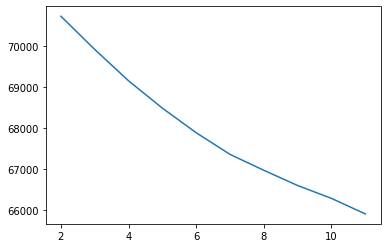

In [ ]:
#your code here
x = np.arange(2, 12)
y = np.arange(2, 12)
for k in x:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(google_vector_list)
  y[k -2] = kmeans.inertia_
plt.plot(x, y)


kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(google_vector_list)

#### **Q7c**
Reduce the dimensionality of the word vectors from the pre-trained model using tSNE

In [ ]:
#your code here
google_data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(google_vector_list)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.005s...
[t-SNE] Computed neighbors for 15000 samples in 12.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for s

#### **Q7d**

#### Create a dataframe with the following columns using the pre-trained vectors and corpus:

| Column |Description|
| --- | --- | 
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- | 
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [ ]:
#your code here
kmeans = KMeans(n_clusters=25, random_state=42)
X = np.array(google_vector_list)
kmeans.fit(X)

google_df = pd.DataFrame(google_data_embed[:,:2],columns=["x","y"])
google_df['Feature 1'] = ds_words
google_df['Feature 2'] = kmeans.labels_
google_df.head()

,x,y,Feature 1,Feature 2
0,-9.322365,8.577855,####M_####M,13
1,-22.441650,4.377532,####U,3
2,-22.788326,6.296349,####p_HDTV,3
3,-16.601377,17.052536,"###,###,###_###,###,###_TOTAL_LIABILITIES",13
4,-8.222578,25.740364,###-####_ext,12


#### **Q7e: Visualization** 

In this question, you are required to visualize and explore the reduced dataset **from the pretrained model** you created in Q7d using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the libary from github. Make sure that it has been executed before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/google_mytext.tsv'

Example:

```
google_df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [ ]:
#your code here
google_df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [ ]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'google_mytext.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization. 

Please include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a snapshot of the visualization and save it on your computer with the filename `google_trained_scatter.png`

2) Upload the `google_trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

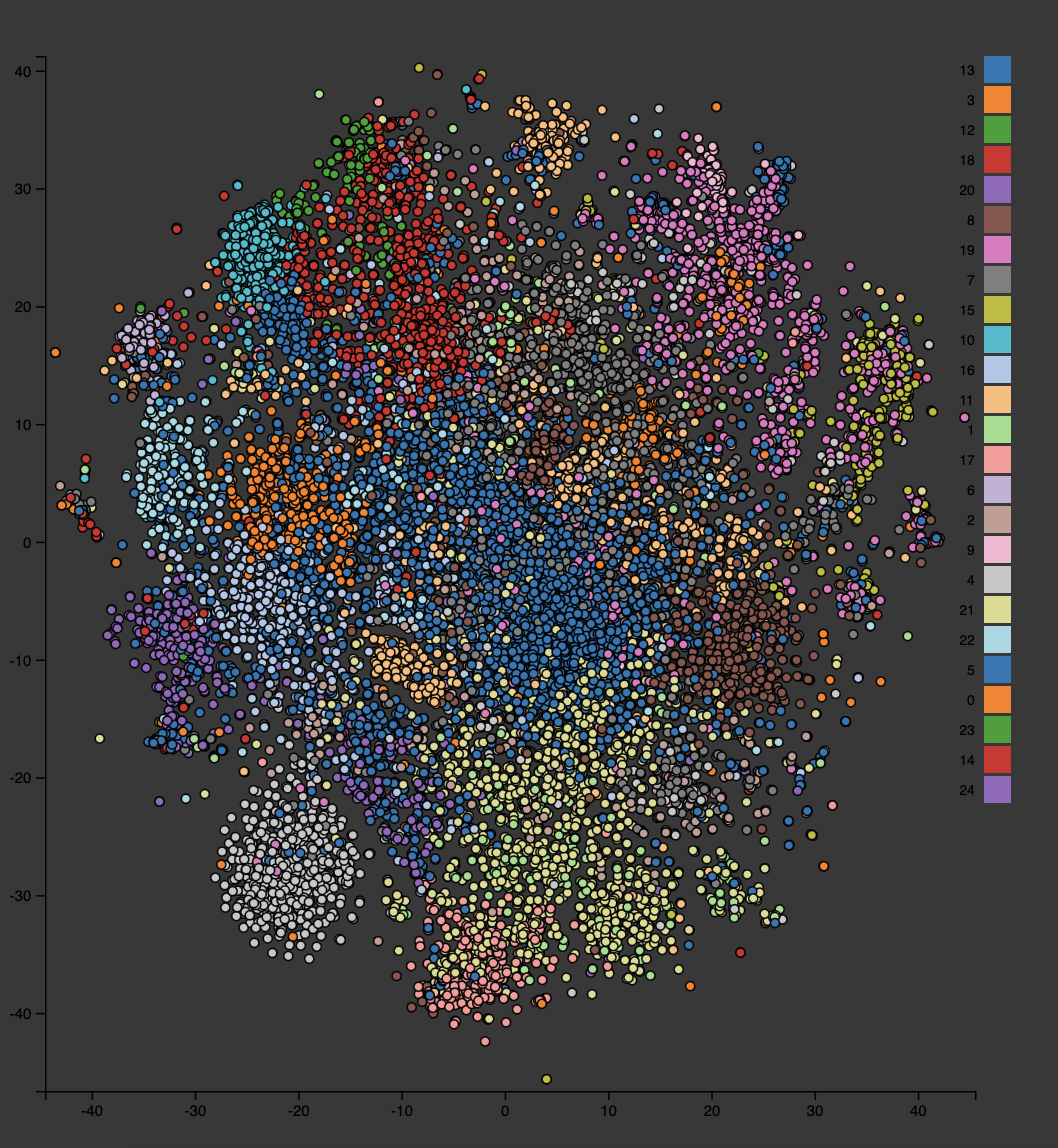

In [ ]:
#This is an autograded cell, do not edit/delete
Image('google_trained_scatter.png')

### **Q8: Exploration** (0.5 points) 

This is an open-ended question.

On the visualizations in Q6 & Q7, lasso-select a group of points with the left mouse button and look at summaries of the group on the right-side of the plot. (Refer to the tutorial video for a demo on the lasso selection). Also look at the words / features of the selected points. 

Comment on any patterns / similarities you see in the selected words in the visualization for the pre-trained vectors and the vectors trained on your corpus. Are you able to find any group of points that are close to each other in the 2D space that also have semantic similarity?

On the right side of the visualization in question 6, there are several punctuation marks and many of the words are shorter and pronouns or prepositions. On the right side of the visualization in question 7, it appears that there are alos punctuation marks and in its case, many proper nouns. Additionally, the points are very divided by cluster label in question six, especially on the right side, whereas the cluster lables are somewhat mixed together on the right side, as well as throughout for question 7.